# Energy Management Comparison Across EU Nations

Comparative Analysis of Energy Generation and Consumption done by **Sweden**, **Germany** and **Poland** during 8 recent years.

The goal of this project is to analyse the energy generation and consumption done by EU nations which have different levels of economic development, sociopolitical structure and influence of religion within the country. Specifically, `we’ll look at data flows to understand whether there are patterns charactarising each nation’s energy handling strategy`. We are going to use free public datasets dedicated to energy handling within Europe, scraped from https://transparency.entsoe.eu. 

Energy Generation: covers various energy sources, mostly sorted by environmental hazard levels.
Energy Consumption: includes actual and predicted consumption values.

Short project [**presentation**](./Comparing%20Energy%20Generation%20and%20Consumption%20in%20EU%20Nations.pdf).

In [1]:
# Basic imports related to data cleaning, wrangling and analysis
import pandas as pd
import numpy as np
import re

# Imports related to data scraping
from bs4 import BeautifulSoup as bs
from datetime import date, timedelta
import time
import requests
from tqdm.notebook import tqdm

# Imports related to visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Imports related to file handling
import os.path
from os import listdir
from os.path import isfile, join


## Data Scrapping and Preprocessing

In [2]:
# def daterange(start_date, end_date):
#     for n in range(int((end_date - start_date).days)):
#         # Timedeltas are differences in times, expressed in difference units, e.g. days, hours, minutes, seconds.
#         # They can be both positive and negative.
#         yield start_date + timedelta(n)


# country_to_area = {
#     "se": "SE-1--------K",
#     "pl": "PL-AREA-----S",
#     "de": "1001A1001A83F",
# }


# def get_load_url(country, date):
#     formatted_date = date.strftime("%d.%m.%Y")
#     area = country_to_area[country]
#     return f"https://transparency.entsoe.eu/load-domain/r2/totalLoadR2/show?name=&defaultValue=false&viewType=TABLE&areaType=CTY&atch=false&dateTime.dateTime={formatted_date}+00:00|CET|DAY&biddingZone.values=CTY|10Y{area}!CTY|10Y{area}&dateTime.timezone=CET_CEST&dateTime.timezone_input=CET+(UTC+1)+/+CEST+(UTC+2)"


# def get_generation_url(country, date):
#     formatted_date = date.strftime("%d.%m.%Y")
#     area = country_to_area[country]
#     return f"https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show?name=&defaultValue=false&viewType=TABLE&areaType=CTY&atch=false&datepicker-day-offset-select-dv-date-from_input=D&dateTime.dateTime={formatted_date}+00:00|CET|DAYTIMERANGE&dateTime.endDateTime={formatted_date}+00:00|CET|DAYTIMERANGE&area.values=CTY|10Y{area}!CTY|10Y{area}&productionType.values=B01&productionType.values=B02&productionType.values=B03&productionType.values=B04&productionType.values=B05&productionType.values=B06&productionType.values=B07&productionType.values=B08&productionType.values=B09&productionType.values=B10&productionType.values=B11&productionType.values=B12&productionType.values=B13&productionType.values=B14&productionType.values=B20&productionType.values=B15&productionType.values=B16&productionType.values=B17&productionType.values=B18&productionType.values=B19&dateTime.timezone=CET_CEST&dateTime.timezone_input=CET+(UTC+1)+/+CEST+(UTC+2)"


# def get_data(country, start_date, end_date, get_url, name):
#     data = []
#     for single_date in tqdm(
#         daterange(start_date, end_date),
#         total=int((end_date - start_date).days),
#         desc=f"{country} {start_date} {name}",
#     ):
#         attempt = 0

#         def run_attempt():
#             try:
#                 nonlocal attempt
#                 attempt += 1
#                 url = get_url(country, single_date)

#                 day_df = pd.read_html(url)[
#                     0
#                 ]  # Assuming the first table is the one you want

#                 time.sleep(2)

#                 # Add 'date' and 'country' columns to the DataFrame
#                 day_df["date"] = single_date
#                 day_df["country"] = country.upper()

#                 data.append(day_df)
#             except Exception as e:
#                 if attempt < 10:
#                     print(e)
#                     print(f"exception, retrying in {2 * attempt} seconds")
#                     time.sleep(2**attempt)
#                     run_attempt()
#                 else:
#                     print(f"skipped {single_date}")

#         run_attempt()

#     # Concatenate all DataFrames in the list into a single DataFrame
#     final_df = pd.concat(data, ignore_index=True)

#     return final_df

In [3]:
def pre_processing(result_df, new_columns, drops):
    # Replace default column names with specified below
    new_columns = new_columns
    result_df.columns = new_columns
    result_df.drop(drops, axis=1, inplace=True)
    return result_df

In [4]:
# loads = []
# generations = []
# for start_date, end_date in [
#     (date(2015, 1, 1), date(2016, 1, 1)),
#     (date(2016, 1, 1), date(2017, 1, 1)),
#     (date(2017, 1, 1), date(2018, 1, 1)),
#     (date(2018, 1, 1), date(2019, 1, 1)),
#     (date(2019, 1, 1), date(2020, 1, 1)),
#     (date(2020, 1, 1), date(2021, 1, 1)),
#     (date(2021, 1, 1), date(2022, 1, 1)),
#     (date(2022, 1, 1), date(2022, 6, 1)),
#     (date(2022, 6, 1), date(2023, 6, 1)),
# ]:
#     for country in ["se", "de", "pl"]:
#         load_file = f"./data/{country}_{start_date.strftime('%d.%m.%Y')}-{end_date.strftime('%d.%m.%Y')}_load.csv"
#         if not os.path.isfile(load_file):
#             df = get_data(country, start_date, end_date, get_load_url, "load")
#             df = pre_processing(df, [
                                        # "Time",
                                        # "Day-ahead Total Load Forecast",
                                        # "Actual Total Load",
                                        # "Unnamed",
                                        # "Date",
                                        # "Country",
                                        # ], "Unnamed")
#             df.to_csv(load_file, index=False)
#             loads.append(df)

#         generation_file = f"./data/{country}_{start_date.strftime('%d.%m.%Y')}-{end_date.strftime('%d.%m.%Y')}_generation.csv"
#         if not os.path.isfile(generation_file):
#             df = get_data(
#                 country, start_date, end_date, get_generation_url, "generation"
#             )
#             df.to_csv(generation_file, index=False)
#             generations.append(df)

## Upload Files into DataFrames

### Load

In [5]:
# Create a list of data files
onlyfiles = [f for f in listdir('./data/') if isfile(join('./data/', f))]
onlyfiles[:5]

['de_01.01.2015-01.01.2016_generation.csv',
 'de_01.01.2015-01.01.2016_load.csv',
 'de_01.01.2016-01.01.2017_generation.csv',
 'de_01.01.2016-01.01.2017_load.csv',
 'de_01.01.2017-01.01.2018_generation.csv']

In [6]:
# Filter files containing 'load' in their name
load_files = [file for file in onlyfiles if 'load' in file]
load_files[:3]

['de_01.01.2015-01.01.2016_load.csv',
 'de_01.01.2016-01.01.2017_load.csv',
 'de_01.01.2017-01.01.2018_load.csv']

In [7]:
# Filter files containing 'generation' in their name
gen_files = [file for file in onlyfiles if 'generation' in file]
gen_files[:3]

['de_01.01.2015-01.01.2016_generation.csv',
 'de_01.01.2016-01.01.2017_generation.csv',
 'de_01.01.2017-01.01.2018_generation.csv']

In [8]:
# Concatenate load
load = pd.concat([pd.read_csv(os.path.join('./data/', file)) for file in load_files])
load

,Time,Day-ahead Total Load Forecast,Actual Total Load,Date,Country
0,00:00 - 00:15,42955.0,44840.0,2015-01-01,DE
1,00:15 - 00:30,42412.0,44475.0,2015-01-01,DE
2,00:30 - 00:45,41901.0,44579.0,2015-01-01,DE
3,00:45 - 01:00,41355.0,44507.0,2015-01-01,DE
4,01:00 - 01:15,40710.0,44038.0,2015-01-01,DE
...,...,...,...,...,...
10940,19:00 - 20:00,13829.0,13758.0,2023-08-30,SE
10941,20:00 - 21:00,13794.0,13781.0,2023-08-30,SE
10942,21:00 - 22:00,13386.0,13314.0,2023-08-30,SE
10943,22:00 - 23:00,12649.0,12583.0,2023-08-30,SE


In [9]:
load.reset_index(inplace=True, drop=True)

In [10]:
load

,Time,Day-ahead Total Load Forecast,Actual Total Load,Date,Country
0,00:00 - 00:15,42955.0,44840.0,2015-01-01,DE
1,00:15 - 00:30,42412.0,44475.0,2015-01-01,DE
2,00:30 - 00:45,41901.0,44579.0,2015-01-01,DE
3,00:45 - 01:00,41355.0,44507.0,2015-01-01,DE
4,01:00 - 01:15,40710.0,44038.0,2015-01-01,DE
...,...,...,...,...,...
444739,19:00 - 20:00,13829.0,13758.0,2023-08-30,SE
444740,20:00 - 21:00,13794.0,13781.0,2023-08-30,SE
444741,21:00 - 22:00,13386.0,13314.0,2023-08-30,SE
444742,22:00 - 23:00,12649.0,12583.0,2023-08-30,SE


### Generation

In [11]:
# Concatenate the generation
gen = pd.concat([pd.read_csv(os.path.join('./data/', file), header = [1,2,3,4]) for file in gen_files])

We are going to remove 'Hydro Pumped Storage' because it's not a sourse of raw energy, it's a battery of sorts. 

In [12]:
# Rename and remove columns
pre_processing(gen, [
    'Time', 
    'Biomass', 
    'Fossil Brown coal/Lignite',  
    'Fossil Coal-derived gas',  
    'Fossil Gas',  
    'Fossil Hard coal',   
    'Fossil Oil',   
    'Fossil Oil shale',   
    'Fossil Peat',   
    'Geothermal',   
    'Hydro Pumped Storage',  
    'Hydro Pumped Storage',  
    'Hydro Run-of-river and poundage',   
    'Hydro Water Reservoir',   
    'Marine',  
    'Nuclear', 
    'Other',  
    'Other renewable',   
    'Solar', 
    'Waste',   
    'Wind Offshore',   
    'Wind Onshore',
    'Date',
    'Country'
    ],
    [
    'Hydro Pumped Storage', 
    'Hydro Pumped Storage'
    ]
    )

,Time,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,...,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore,Date,Country
0,00:00 - 00:15,3995.0,15859.0,0.0,1269.0,3222.0,177.0,n/e,n/e,10.0,...,n/e,10742.0,4601.0,123.0,0.0,295.0,524.0,8776.0,2015-01-01,DE
1,00:15 - 00:30,4001.0,15803.0,0.0,1265.0,3332.0,177.0,n/e,n/e,10.0,...,n/e,10585.0,4514.0,123.0,0.0,297.0,521.0,8785.0,2015-01-01,DE
2,00:30 - 00:45,4000.0,15649.0,0.0,1254.0,3225.0,177.0,n/e,n/e,10.0,...,n/e,10643.0,4530.0,123.0,0.0,300.0,519.0,8908.0,2015-01-01,DE
3,00:45 - 01:00,3994.0,15438.0,0.0,1117.0,3100.0,175.0,n/e,n/e,10.0,...,n/e,10872.0,4625.0,123.0,0.0,301.0,520.0,8930.0,2015-01-01,DE
4,01:00 - 01:15,3965.0,15552.0,0.0,1046.0,2534.0,175.0,n/e,n/e,10.0,...,n/e,11089.0,4650.0,123.0,0.0,297.0,520.0,8964.0,2015-01-01,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,19:00 - 20:00,n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,n/e,...,n/e,2723.0,415.0,n/e,128,n/e,n/e,7321.0,2023-05-31,SE
8757,20:00 - 21:00,n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,n/e,...,n/e,2725.0,406.0,n/e,30,n/e,n/e,7163.0,2023-05-31,SE
8758,21:00 - 22:00,n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,n/e,...,n/e,2717.0,399.0,n/e,3,n/e,n/e,6929.0,2023-05-31,SE
8759,22:00 - 23:00,n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,n/e,...,n/e,2716.0,393.0,n/e,0,n/e,n/e,6704.0,2023-05-31,SE


In [13]:
gen.reset_index(inplace=True, drop=True)

## Data Cleaning

- `n/e` values in this particular dataset is meant `no entry`, which means there is no data to register. We are going to replace it with `NaN`, but leave them in place because we'll aggregate data by Date column, so we'll be able to get the number of loaded and generated energy per day for most cases. 
- `0` means there were no energy obtained in this particular time of the day. 
- We are also going to convert date to pandas `datetime` format in both datasets and group them by date.

### Load

In [14]:
# Replace 'n/e' with NaN
load.replace('n/e', np.nan, inplace=True)

In [15]:
load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444744 entries, 0 to 444743
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Time                           444744 non-null  object 
 1   Day-ahead Total Load Forecast  444498 non-null  float64
 2   Actual Total Load              444641 non-null  float64
 3   Date                           444744 non-null  object 
 4   Country                        444744 non-null  object 
dtypes: float64(2), object(3)
memory usage: 17.0+ MB


In [16]:
# Change the type of Date column 
load.Date = pd.to_datetime(load.Date, format='%Y-%m-%d') 
load.Date

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
444739   2023-08-30
444740   2023-08-30
444741   2023-08-30
444742   2023-08-30
444743   2023-08-30
Name: Date, Length: 444744, dtype: datetime64[ns]

In [17]:
# Aggregate by date 
load = pd.DataFrame(load.groupby(['Date', 'Country']).agg({'Day-ahead Total Load Forecast': 'sum', 'Actual Total Load': 'sum'}))
load.reset_index(inplace=True)
load[:10]

,Date,Country,Day-ahead Total Load Forecast,Actual Total Load
0,2015-01-01,DE,4354456.0,4387411.0
1,2015-01-01,PL,0.0,362362.0
2,2015-01-01,SE,360528.0,376417.0
3,2015-01-02,DE,4686503.0,5155659.0
4,2015-01-02,PL,427754.0,428862.0
5,2015-01-02,SE,392697.0,399196.0
6,2015-01-03,DE,4506485.0,4853238.0
7,2015-01-03,PL,423348.0,424438.0
8,2015-01-03,SE,403318.0,410300.0
9,2015-01-04,DE,4193651.0,4711584.0


In [18]:
load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           9310 non-null   datetime64[ns]
 1   Country                        9310 non-null   object        
 2   Day-ahead Total Load Forecast  9310 non-null   float64       
 3   Actual Total Load              9310 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 291.1+ KB


In [19]:
load.shape

(9310, 4)

### Generation

In [20]:
# Replace 'n/e' with NaN
gen.replace('n/e', np.nan, inplace=True)
gen[:3]

,Time,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,...,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore,Date,Country
0,00:00 - 00:15,3995.0,15859.0,0.0,1269.0,3222.0,177.0,NaN,NaN,10.0,...,NaN,10742.0,4601.0,123.0,0.0,295.0,524.0,8776.0,2015-01-01,DE
1,00:15 - 00:30,4001.0,15803.0,0.0,1265.0,3332.0,177.0,NaN,NaN,10.0,...,NaN,10585.0,4514.0,123.0,0.0,297.0,521.0,8785.0,2015-01-01,DE
2,00:30 - 00:45,4000.0,15649.0,0.0,1254.0,3225.0,177.0,NaN,NaN,10.0,...,NaN,10643.0,4530.0,123.0,0.0,300.0,519.0,8908.0,2015-01-01,DE


In [21]:
gen = gen.drop(columns=['Time'])
gen['Fossil Coal-derived gas'] = pd.to_numeric(gen['Fossil Coal-derived gas'], errors='coerce')
gen['Solar'] = pd.to_numeric(gen['Solar'], errors='coerce')
gen['Fossil Gas'] = pd.to_numeric(gen['Fossil Gas'], errors='coerce')

In [22]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442560 entries, 0 to 442559
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Biomass                          368731 non-null  float64
 1   Fossil Brown coal/Lignite        364123 non-null  float64
 2   Fossil Coal-derived gas          234907 non-null  float64
 3   Fossil Gas                       369469 non-null  float64
 4   Fossil Hard coal                 368731 non-null  float64
 5   Fossil Oil                       364268 non-null  float64
 6   Fossil Oil shale                 0 non-null       float64
 7   Fossil Peat                      0 non-null       float64
 8   Geothermal                       295003 non-null  float64
 9   Hydro Run-of-river and poundage  368731 non-null  float64
 10  Hydro Water Reservoir            442336 non-null  float64
 11  Marine                           0 non-null       float64
 12  Nu

In [23]:
gen.Date = pd.to_datetime(gen.Date, format='%Y-%m-%d')
gen.Date

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
442555   2023-05-31
442556   2023-05-31
442557   2023-05-31
442558   2023-05-31
442559   2023-05-31
Name: Date, Length: 442560, dtype: datetime64[ns]

In [24]:
# Aggregate by date 
gen = pd.DataFrame(gen.groupby(['Date', 'Country']).agg('sum'))
gen.reset_index(inplace=True)
gen[:10]

,Date,Country,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,...,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,2015-01-01,DE,382202.0,1258396.0,0.0,95224.0,242901.0,17063.0,0.0,0.0,...,106645.0,3207.0,0.0,1005941.0,502379.0,7658.0,68321.0,29794.0,50481.0,1256414.0
1,2015-01-01,PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43699.0
2,2015-01-01,SE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-02,DE,377616.0,1029376.0,0.0,119677.0,334469.0,17635.0,0.0,0.0,...,104900.0,3451.0,0.0,873742.0,542804.0,10644.0,31036.0,47377.0,41750.0,2343719.0
4,2015-01-02,PL,5702.0,105918.0,1462.0,10138.0,191524.0,0.0,0.0,0.0,...,4250.0,129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77611.0
5,2015-01-02,SE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2015-01-03,DE,377951.0,1186910.0,0.0,119163.0,243997.0,18456.0,0.0,0.0,...,120600.0,3943.0,0.0,981006.0,498137.0,11989.0,28939.0,53363.0,48937.0,1824864.0
7,2015-01-03,PL,5155.0,108707.0,1481.0,10259.0,178604.0,0.0,0.0,0.0,...,4450.0,129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80985.0
8,2015-01-03,SE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2015-01-04,DE,379059.0,1151602.0,0.0,85883.0,188898.0,18509.0,0.0,0.0,...,165401.0,3448.0,0.0,1006511.0,473900.0,11936.0,79930.0,50334.0,46572.0,1560257.0


In [25]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219 entries, 0 to 9218
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             9219 non-null   datetime64[ns]
 1   Country                          9219 non-null   object        
 2   Biomass                          9219 non-null   float64       
 3   Fossil Brown coal/Lignite        9219 non-null   float64       
 4   Fossil Coal-derived gas          9219 non-null   float64       
 5   Fossil Gas                       9219 non-null   float64       
 6   Fossil Hard coal                 9219 non-null   float64       
 7   Fossil Oil                       9219 non-null   float64       
 8   Fossil Oil shale                 9219 non-null   float64       
 9   Fossil Peat                      9219 non-null   float64       
 10  Geothermal                       9219 non-null   float64    

In [26]:
# Fill missing with previously standing values 
gen.loc[gen['Country'] == 'DE', 'Fossil Coal-derived gas'] = gen.loc[gen['Country'] == 'DE', 'Fossil Coal-derived gas'].sort_values().ffill()
gen.loc[gen['Country'] == 'DE', 'Fossil Gas'] = gen.loc[gen['Country'] == 'DE', 'Fossil Gas'].sort_values().ffill()
gen.loc[gen['Country'] == 'DE', 'Solar'] = gen.loc[gen['Country'] == 'DE', 'Solar'].sort_values().ffill()

gen.loc[gen['Country'] == 'PL', 'Solar'] = gen.loc[gen['Country'] == 'PL', 'Solar'].sort_values().ffill()
gen.loc[gen['Country'] == 'PL', 'Fossil Gas'] = gen.loc[gen['Country'] == 'PL', 'Fossil Gas'].sort_values().ffill()
gen.loc[gen['Country'] == 'PL', 'Fossil Coal-derived gas'] = gen.loc[gen['Country'] == 'PL', 'Fossil Coal-derived gas'].sort_values().ffill()

gen.loc[gen['Country'] == 'SE', 'Solar'] = gen.loc[gen['Country'] == 'SE', 'Solar'].sort_values().ffill()
gen.loc[gen['Country'] == 'SE', 'Fossil Gas'] = gen.loc[gen['Country'] == 'SE', 'Fossil Gas'].sort_values().ffill()
gen.loc[gen['Country'] == 'SE', 'Fossil Coal-derived gas'] = gen.loc[gen['Country'] == 'SE', 'Fossil Coal-derived gas'].sort_values().ffill()

In [27]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219 entries, 0 to 9218
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             9219 non-null   datetime64[ns]
 1   Country                          9219 non-null   object        
 2   Biomass                          9219 non-null   float64       
 3   Fossil Brown coal/Lignite        9219 non-null   float64       
 4   Fossil Coal-derived gas          9219 non-null   float64       
 5   Fossil Gas                       9219 non-null   float64       
 6   Fossil Hard coal                 9219 non-null   float64       
 7   Fossil Oil                       9219 non-null   float64       
 8   Fossil Oil shale                 9219 non-null   float64       
 9   Fossil Peat                      9219 non-null   float64       
 10  Geothermal                       9219 non-null   float64    

In [28]:
gen.shape

(9219, 21)

Let's check how our data set look in terms of data continuity. 

In [29]:
# remove black frames
sns.despine(trim=True, right=True)

# Set style to 'darkgrid'
sns.set(style='darkgrid')


# Clear Matplotlib cache and save the plot in high resolution 
plt.rcParams.update({'figure.dpi': 200})
plt.savefig('output_figure.png')

<Figure size 640x480 with 0 Axes>

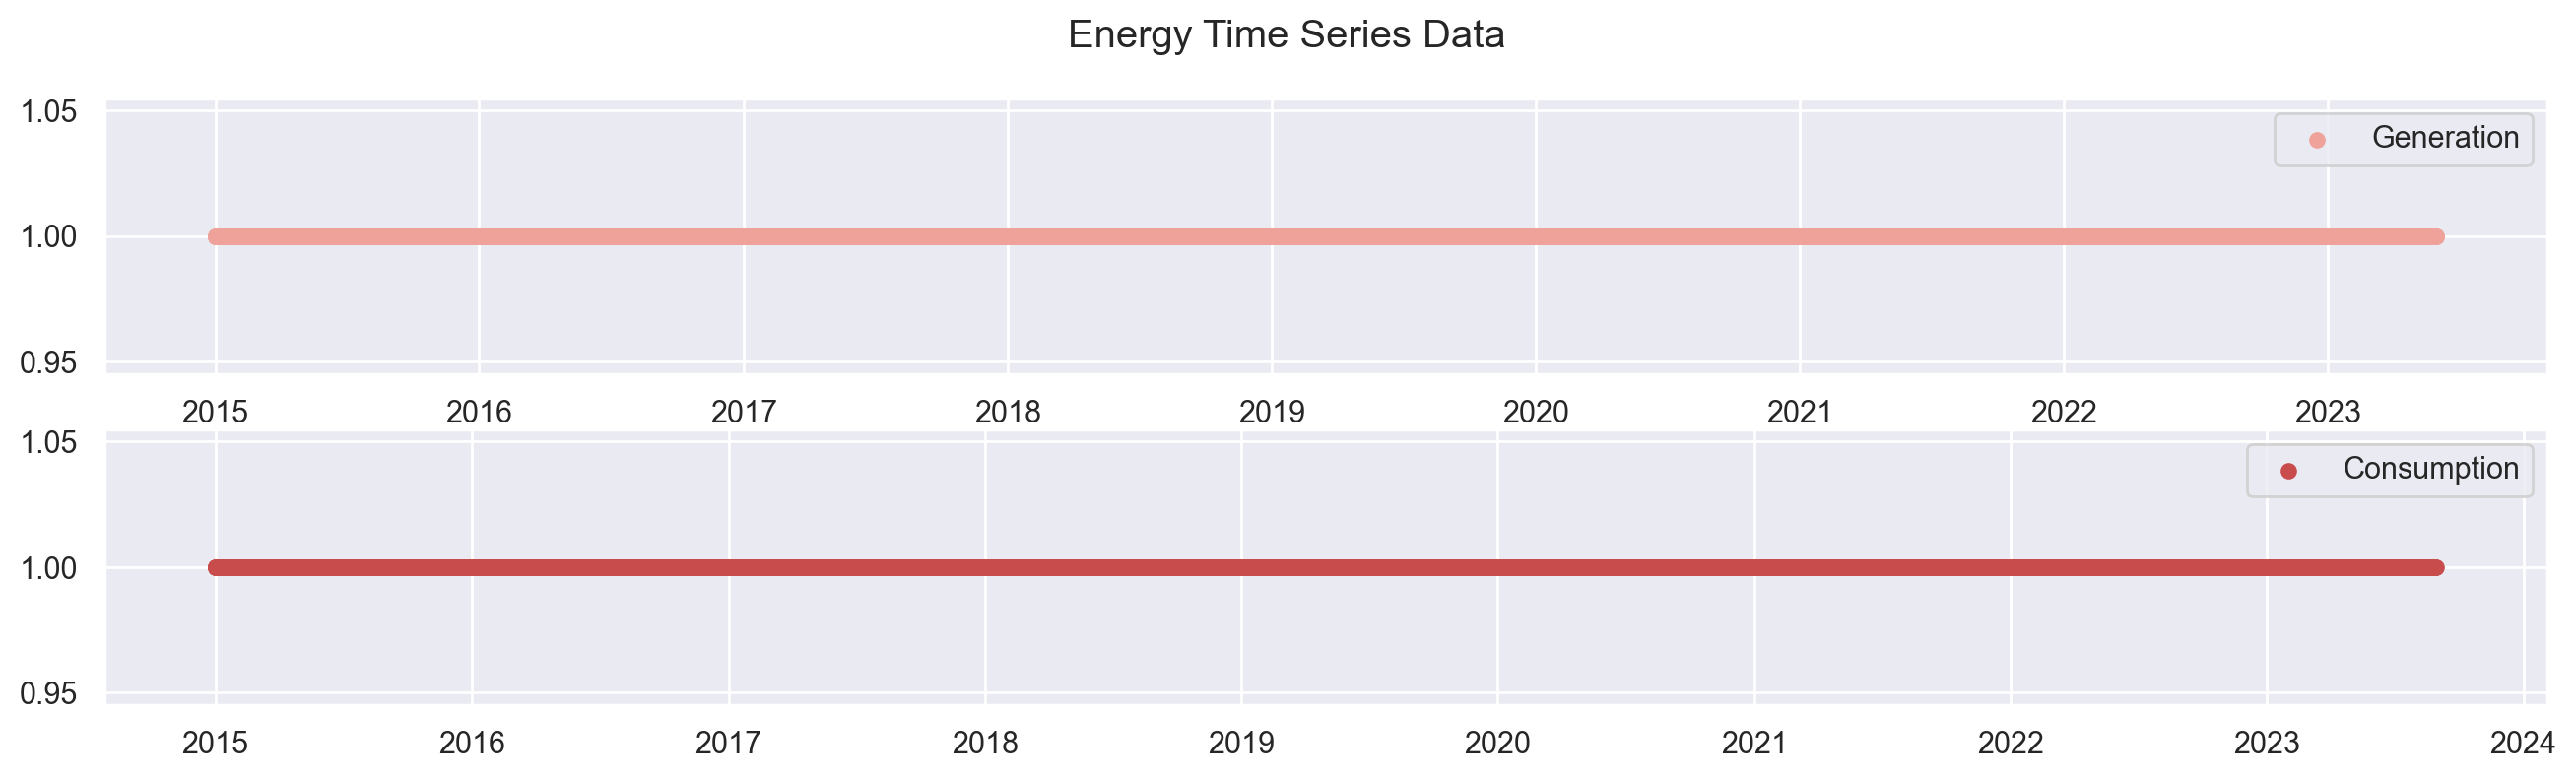

In [30]:
# Set up grid
fig, ax = plt.subplots(2, 1, figsize=(16, 4))
# Put data on the plots
sns.scatterplot(data=gen, x='Date', y=1, linewidth=0, label='Generation', color='#eea29a', ax=ax[0])
sns.scatterplot(data=load, x='Date', y=1, linewidth=0, label='Consumption', color='#c94c4c', ax=ax[1])

# Add title
fig.suptitle("Energy Time Series Data")
ax[0].set(xlabel=None)
ax[1].set(xlabel=None)

# Show the result
plt.show()

Looks like our data is more or less continuous and has no gaps, we can start the analysis. 

## Summarization and Comparison

In [31]:
load.describe()

,Date,Day-ahead Total Load Forecast,Actual Total Load
count,9310,9.310000e+03,9.310000e+03
mean,2019-04-01 11:06:56.842105088,2.027314e+06,2.074521e+06
min,2015-01-01 00:00:00,0.000000e+00,0.000000e+00
25%,2017-02-14 06:00:00,3.984155e+05,3.944408e+05
50%,2019-04-01 00:00:00,4.819000e+05,4.740260e+05
75%,2021-05-16 00:00:00,4.903899e+06,4.973087e+06
max,2023-08-30 00:00:00,6.580204e+06,6.914253e+06
std,NaN,2.314357e+06,2.393756e+06


In [32]:
gen.describe()

,Date,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
count,9219,9219.000000,9.219000e+03,9219.000000,9.219000e+03,9.219000e+03,9219.000000,9219.0,9219.0,9219.000000,9219.000000,9219.000000,9219.0,9.219000e+03,9.219000e+03,9219.000000,9.219000e+03,9219.000000,9219.000000,9.219000e+03
mean,2019-03-17 00:00:00,145462.599306,4.415237e+05,6672.485085,1.518977e+05,2.947573e+05,11505.518603,0.0,0.0,646.290270,52698.634234,65572.508732,0.0,2.883606e+05,7.081725e+04,4572.633691,1.569267e+05,21542.799219,72409.129407,3.611180e+05
min,2015-01-01 00:00:00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2017-02-07 00:00:00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,456.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,3.136450e+04
50%,2019-03-17 00:00:00,5675.000000,1.176320e+05,0.000000,2.427200e+04,2.021980e+05,4670.000000,0.0,0.0,0.000000,4115.000000,8803.000000,0.0,1.555670e+05,1.899700e+04,0.000000,0.000000e+00,0.000000,0.000000,6.810400e+04
75%,2021-04-23 00:00:00,416671.000000,1.032982e+06,1671.000000,2.238390e+05,3.352720e+05,19434.500000,0.0,0.0,1595.000000,125993.500000,159349.000000,0.0,6.175090e+05,3.532950e+04,11232.000000,1.701815e+05,57283.000000,85507.000000,4.214735e+05
max,2023-05-31 00:00:00,481921.000000,1.877499e+06,69730.000000,1.280729e+06,1.706546e+06,68019.000000,0.0,0.0,3027.000000,268793.000000,321167.000000,0.0,1.098514e+06,1.890389e+06,22577.000000,1.420397e+06,92764.000000,621324.000000,3.851406e+06
std,NaN,202899.278439,5.820223e+05,14612.375989,2.467936e+05,3.583292e+05,14644.979288,0.0,0.0,959.232469,74565.139180,88912.617490,0.0,3.323163e+05,1.612931e+05,6784.444526,2.815219e+05,31378.000184,134382.680530,6.182089e+05


We are going to change the `Biomass` place in the list of columns to order energy sources in the order of environmental hazard. 

In [33]:
# Rearrange columns
new_order = ['Date', 'Country', 'Fossil Brown coal/Lignite', 'Fossil Coal-derived gas', 'Fossil Gas',
             'Fossil Hard coal', 'Fossil Oil', 'Fossil Oil shale', 'Fossil Peat', 'Biomass', 'Geothermal',
             'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Marine', 'Nuclear', 'Other',
             'Other renewable', 'Solar', 'Waste', 'Wind Offshore', 'Wind Onshore']

gen = gen[new_order]

gen[:3]


,Date,Country,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Biomass,...,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,2015-01-01,DE,1258396.0,0.0,95224.0,242901.0,17063.0,0.0,0.0,382202.0,...,106645.0,3207.0,0.0,1005941.0,502379.0,7658.0,68321.0,29794.0,50481.0,1256414.0
1,2015-01-01,PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43699.0
2,2015-01-01,SE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Load

Let's find some general statistics for the `load` set and display it on the graph. 

In [34]:
load

,Date,Country,Day-ahead Total Load Forecast,Actual Total Load
0,2015-01-01,DE,4354456.0,4387411.0
1,2015-01-01,PL,0.0,362362.0
2,2015-01-01,SE,360528.0,376417.0
3,2015-01-02,DE,4686503.0,5155659.0
4,2015-01-02,PL,427754.0,428862.0
...,...,...,...,...
9305,2023-08-26,SE,284966.0,281348.0
9306,2023-08-27,SE,282957.0,275622.0
9307,2023-08-28,SE,315984.0,305860.0
9308,2023-08-29,SE,318226.0,306927.0


In [35]:
# Split the DataFrame into three different DataFrames by country
load_de = load[load['Country'] == 'DE']
load_pl = load[load['Country'] == 'PL']
load_se = load[load['Country'] == 'SE']

In [36]:
# Calculate necessary statistics for the plot
def group_load_by_date(data):
    return data.groupby(by=lambda x: data.loc[x]['Date'].replace(day=1)).agg({
        'Actual Total Load': ['min', 'max', 'mean'], 
        'Day-ahead Total Load Forecast': ['min', 'max', 'mean']
        }).reset_index().rename(columns={'index': 'Date'})

aggr_de = group_load_by_date(load[load['Country'] == 'DE'])
aggr_pl = group_load_by_date(load[load['Country'] == 'PL'])
aggr_se = group_load_by_date(load[load['Country'] == 'SE'])

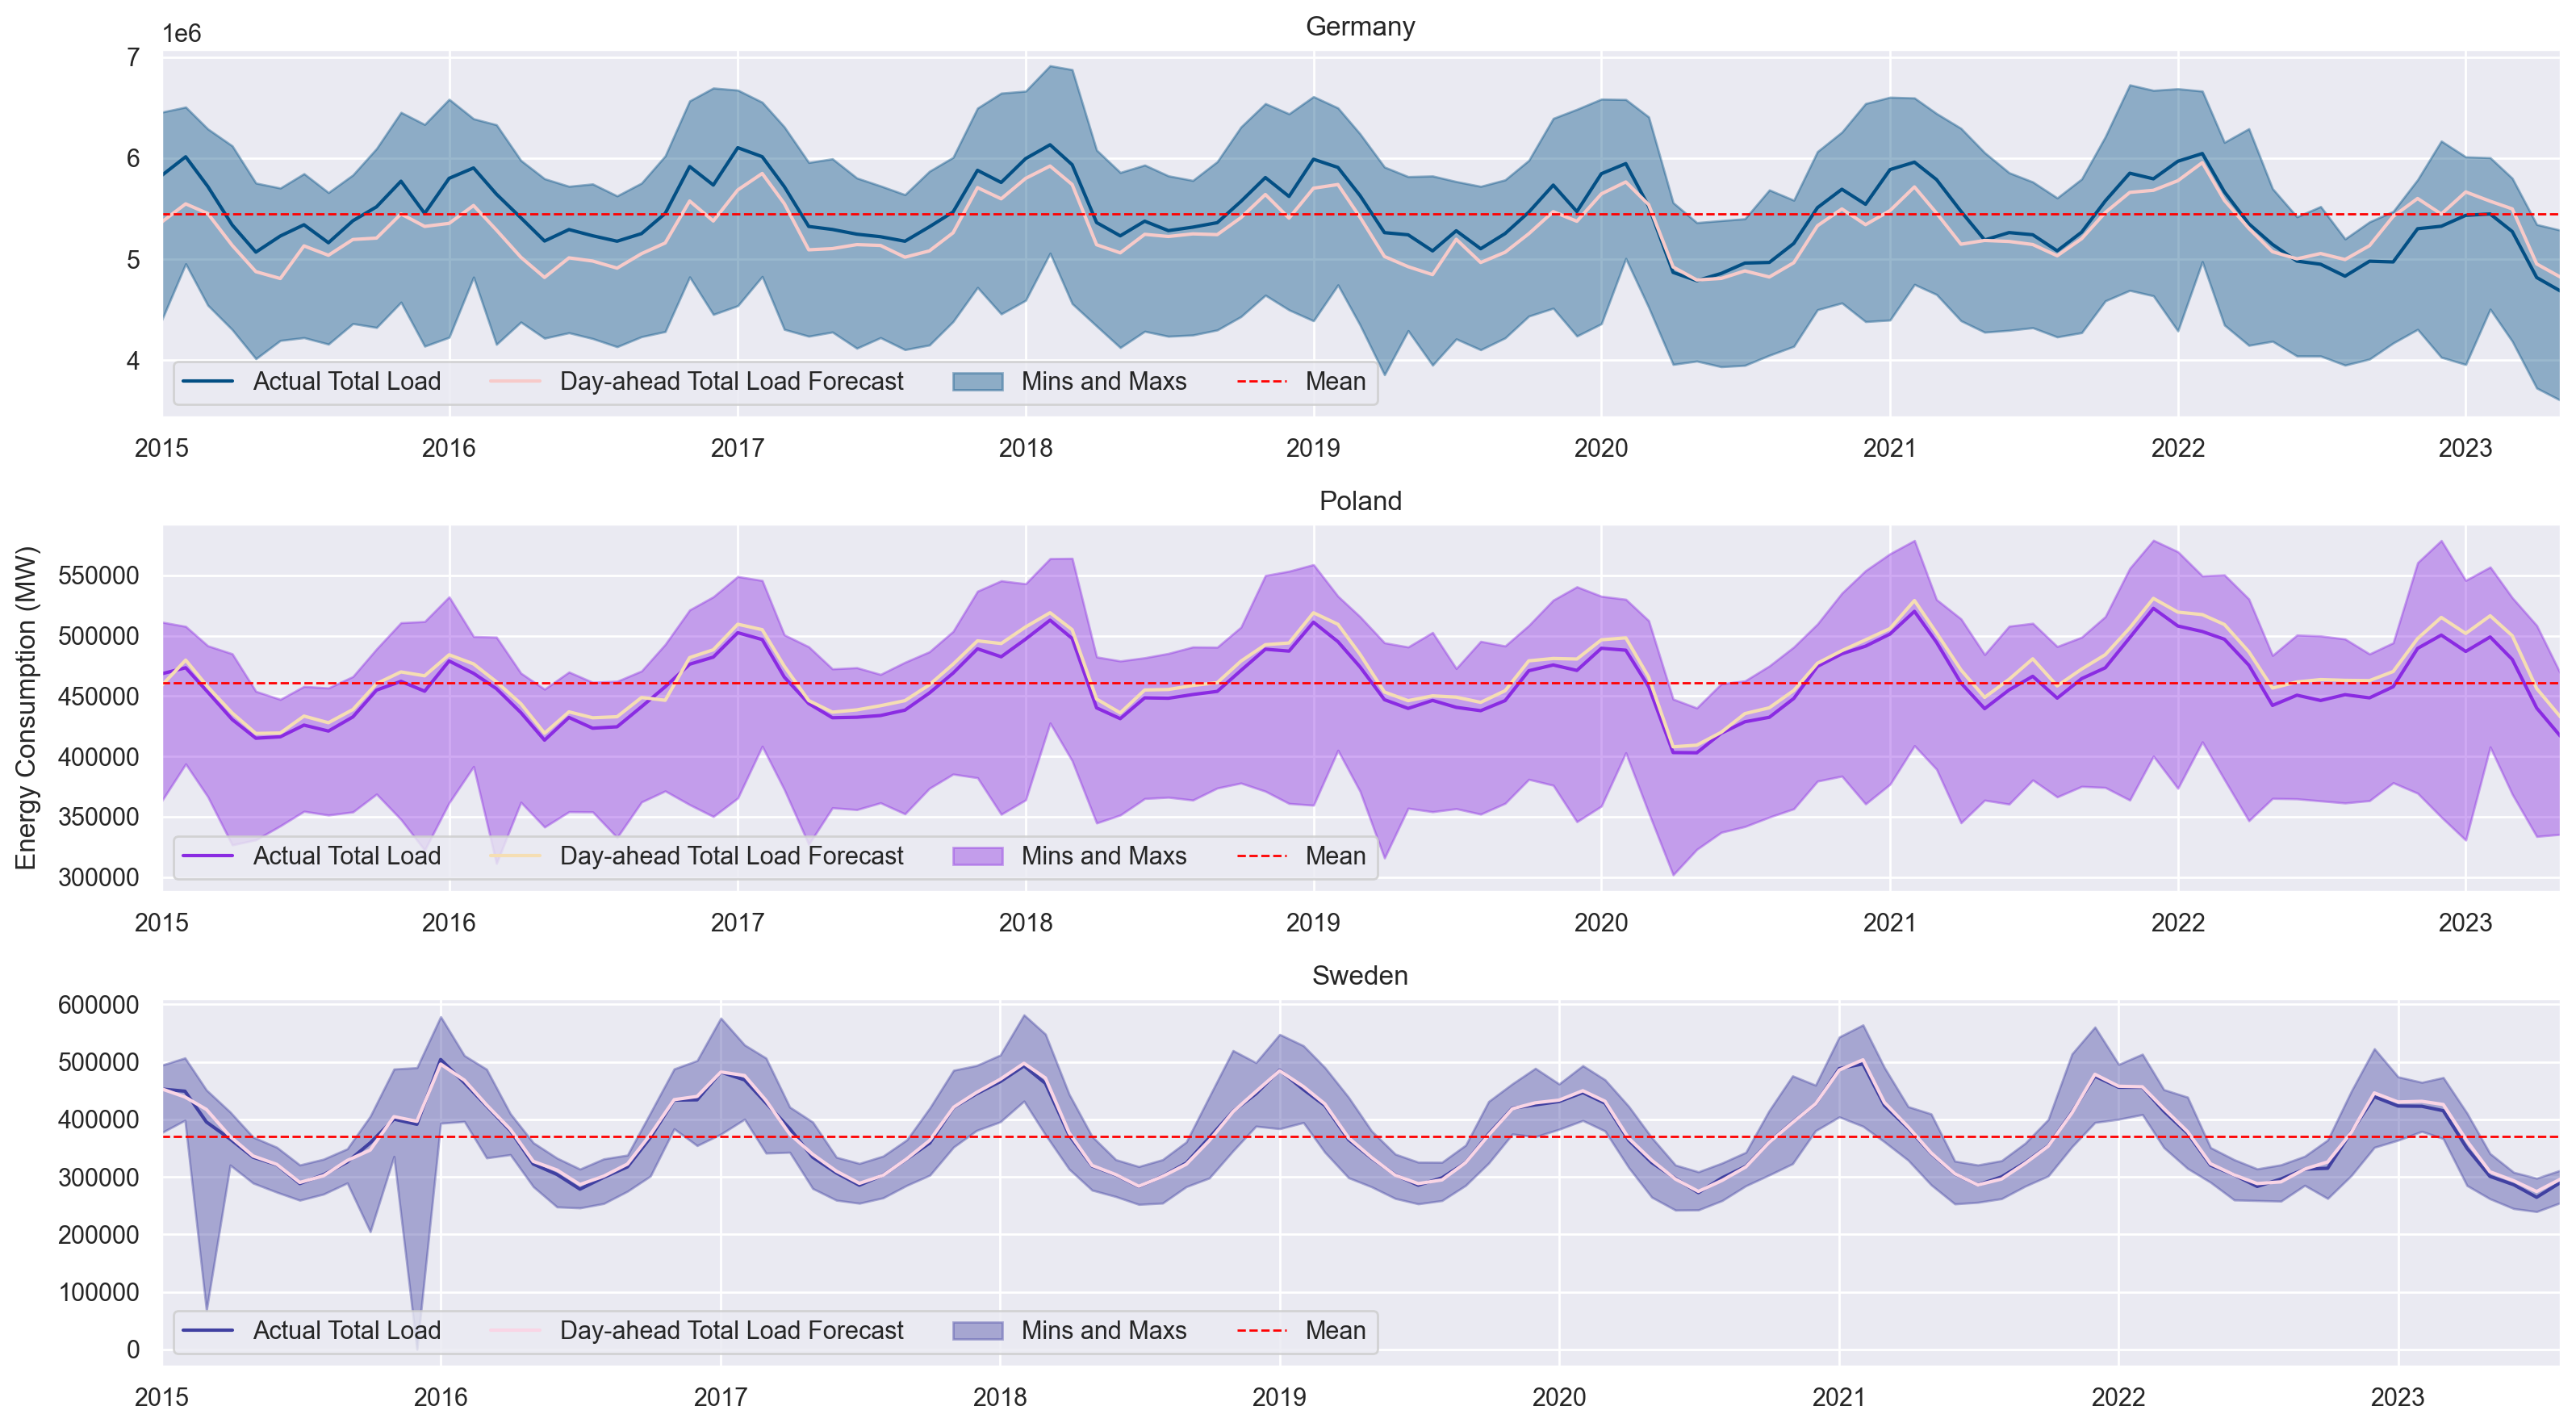

In [37]:
# Set up figure size
fig = plt.figure(figsize = (16,9))
# Set up number of subplots 
gs = GridSpec(3, 4, figure=fig)

# Arrange subplots on canvas
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])

# Adjustments to the plot
de = 'Germany' 
pl = 'Poland' 
se = 'Sweden'

charts = [
    (aggr_de, '#034f84', '#f7cac9', ax1, de),
    (aggr_pl, 'BlueViolet', 'Wheat', ax2, pl),
    (aggr_se, '#4040a1', '#f9d5e5', ax3, se),
]

for data, color1, color2, ax, country in charts:
    # Pass data to the plot
    sns.lineplot(
        data,
        x='Date', 
        y=('Actual Total Load', 'mean'),  
        legend='full',
        color=color1, 
        ax=ax,
        label='Actual Total Load')

    sns.lineplot(
        data,
        x='Date', 
        y=('Day-ahead Total Load Forecast', 'mean'),  
        color=color2, 
        ax=ax,
        label='Day-ahead Total Load Forecast')
        
    y='Actual Total Load'
        
    # Fill the space between statistics with color
    ax.fill_between(
        data['Date'], 
        data[y]['min'], 
        data[y]['max'], 
        alpha=0.4, 
        color=color1,
        label='Mins and Maxs')

    # Set up plot limits
    start_end = [data['Date'].min(), data['Date'].max()]
    ax.set_xlim(start_end)
    ax.set(xlabel=None, ylabel=None)

    # Adjust the y-label position (add margin)
    ax.set(ylabel='Energy Consumption (MW)')
    ax.yaxis.set_label_coords(-0.05, 0.5)

    # Plot the mean above
    sns.lineplot(
        x=start_end, 
        y=[data[y]['mean'].mean(), data[y]['mean'].mean()],  
        color='Red', 
        linewidth=1,
        linestyle='--',
        label='Mean', 
        ax=ax)

    # Anchor legend
    ax.legend(loc='lower left', ncol=4)

    # Add descriptions
    ax.set_title(country, fontsize='medium')
    
# Remove ylabels from 1 and 3 plots
ax1.set(ylabel=None)
ax3.set(ylabel=None)

plt.tight_layout()
plt.show()

Result: Energy consumption mostly follows normal seasonality pattern with falls during summers and increases in winter. 
There are, however, several plunges on the graph of Sweden in 2015 and 2016.

### Generation

Now let's switch our attention to energy generation. First we aggregate data for the plot.

In [38]:
agg_gen = gen.groupby(['Country', lambda x: gen.loc[x]['Date'].replace(day=1)]).agg('mean').reset_index().drop(columns=['Date']).rename(columns={'level_1': 'Date'})

In [39]:
total_gen = pd.DataFrame(gen[['Country', 'Date']])
total_gen['Generated'] = gen.iloc[:, 2:].sum(axis=1)
total_gen

,Country,Date,Generated
0,DE,2015-01-01,5027562.0
1,PL,2015-01-01,43699.0
2,SE,2015-01-01,0.0
3,DE,2015-01-02,5879168.0
4,PL,2015-01-02,396734.0
...,...,...,...
9214,PL,2023-05-30,372855.0
9215,SE,2023-05-30,367644.0
9216,DE,2023-05-31,4262780.0
9217,PL,2023-05-31,377442.0


Now we plot the data.

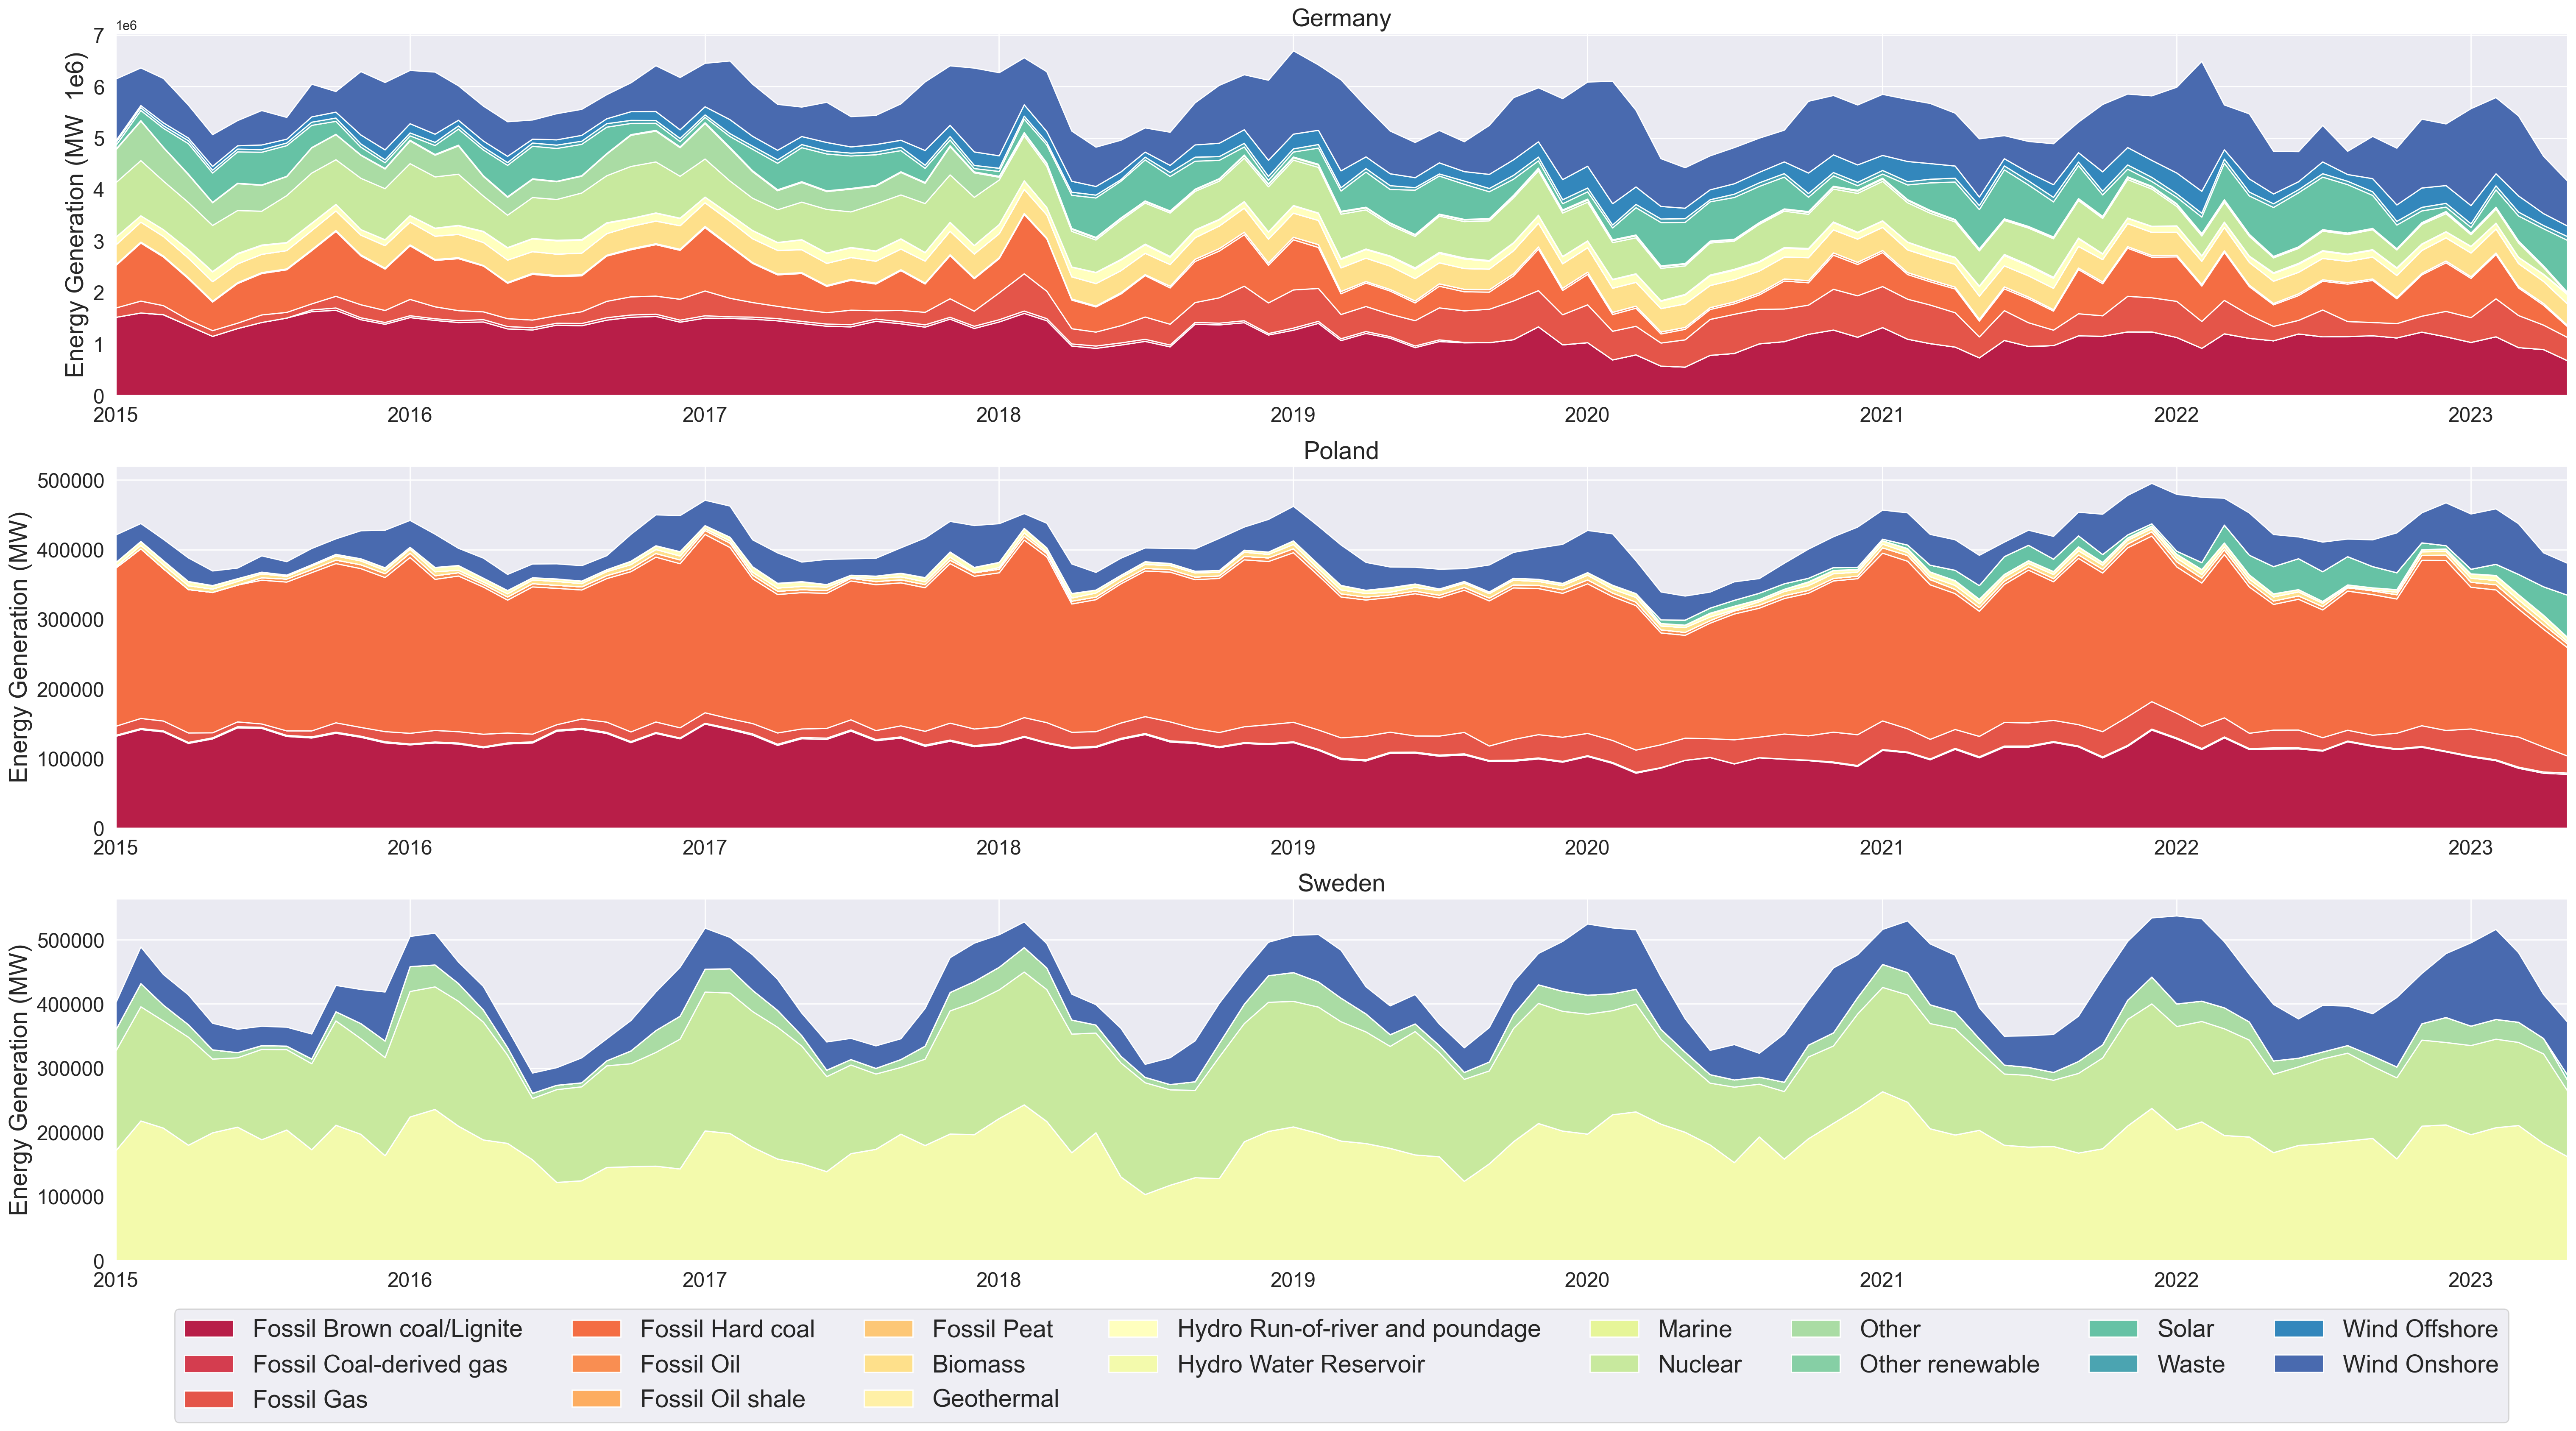

In [40]:
# Set up figure size
fig = plt.figure(figsize=(32, 17))
# Set up number of subplots
gs = GridSpec(3, 4, figure=fig)

# Arrange subplots on canvas
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])

# Add subplots' adjustments
de = 'Germany'
pl = 'Poland'
se = 'Sweden'

charts = [
    ('DE', 'flare', ax1, de, False, 'Energy Generation (MW  1e6)'),
    ('PL', 'flare', ax2, pl, False, 'Energy Generation (MW)'),
    ('SE', 'flare', ax3, se, True, 'Energy Generation (MW)'),
]

# Display subplots
for country, color1, ax, country_name, draw_legend, ylabel in charts:
    gen_country = agg_gen[agg_gen['Country'] == country]
    ax.stackplot(
        gen_country['Date'],
        gen_country['Fossil Brown coal/Lignite'], gen_country['Fossil Coal-derived gas'],
        gen_country['Fossil Gas'], gen_country['Fossil Hard coal'], gen_country['Fossil Oil'], gen_country['Fossil Oil shale'],
        gen_country['Fossil Peat'], gen_country['Biomass'], gen_country['Geothermal'], gen_country['Hydro Run-of-river and poundage'],
        gen_country['Hydro Water Reservoir'], gen_country['Marine'], gen_country['Nuclear'], gen_country['Other'],
        gen_country['Other renewable'], gen_country['Solar'], gen_country['Waste'], gen_country['Wind Offshore'],
        gen_country['Wind Onshore'],
        colors=sns.color_palette('Spectral', len(gen_country.columns) - 2),
        labels=gen_country.columns[2:])
    if draw_legend:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=8, fontsize='xx-large')

    # Set up subplots limits
    start_end = [gen_country['Date'].min(), gen_country['Date'].max()]
    ax.set_xlim(start_end)

    # Add descriptions
    ax.set_title(country_name, fontsize='xx-large')
    ax.set_ylabel(ylabel, fontsize='xx-large')  # Use the specified ylabel
    for item in ax.get_xticklabels() + ax.get_yticklabels():
        item.set_fontsize('x-large')


plt.tight_layout()


plt.show()


Result: 

- Here we can see that Germany is a leader of production with about 7 million megawatts of energy balanced between renewables and fossils. 

- Poland uses mostly fossils, but started adding renewables in 2020.

- Sweden uses more renewables as well as nuclear power. 

Now let's find the difference between generation and consumption. 

In [41]:
together = pd.merge(load, total_gen, on=['Date', 'Country'])
to_agg = together.groupby(['Country', lambda x: together.loc[x]['Date'].replace(day=1)]).agg({'Actual Total Load': 'sum', 'Generated': 'sum'}).reset_index().rename(columns={'level_1': 'Date'})
together['Diff'] = together['Generated'] - together['Actual Total Load']
together['Diff type'] = together['Diff'] > 0
together

,Date,Country,Day-ahead Total Load Forecast,Actual Total Load,Generated,Diff,Diff type
0,2015-01-01,DE,4354456.0,4387411.0,5027562.0,640151.0,True
1,2015-01-01,PL,0.0,362362.0,43699.0,-318663.0,False
2,2015-01-01,SE,360528.0,376417.0,0.0,-376417.0,False
3,2015-01-02,DE,4686503.0,5155659.0,5879168.0,723509.0,True
4,2015-01-02,PL,427754.0,428862.0,396734.0,-32128.0,False
...,...,...,...,...,...,...,...
9214,2023-05-30,PL,462250.0,433744.0,372855.0,-60889.0,False
9215,2023-05-30,SE,307894.0,299807.0,367644.0,67837.0,True
9216,2023-05-31,DE,5064947.0,4957164.0,4262780.0,-694384.0,False
9217,2023-05-31,PL,451950.0,434059.0,377442.0,-56617.0,False


And visualise it.

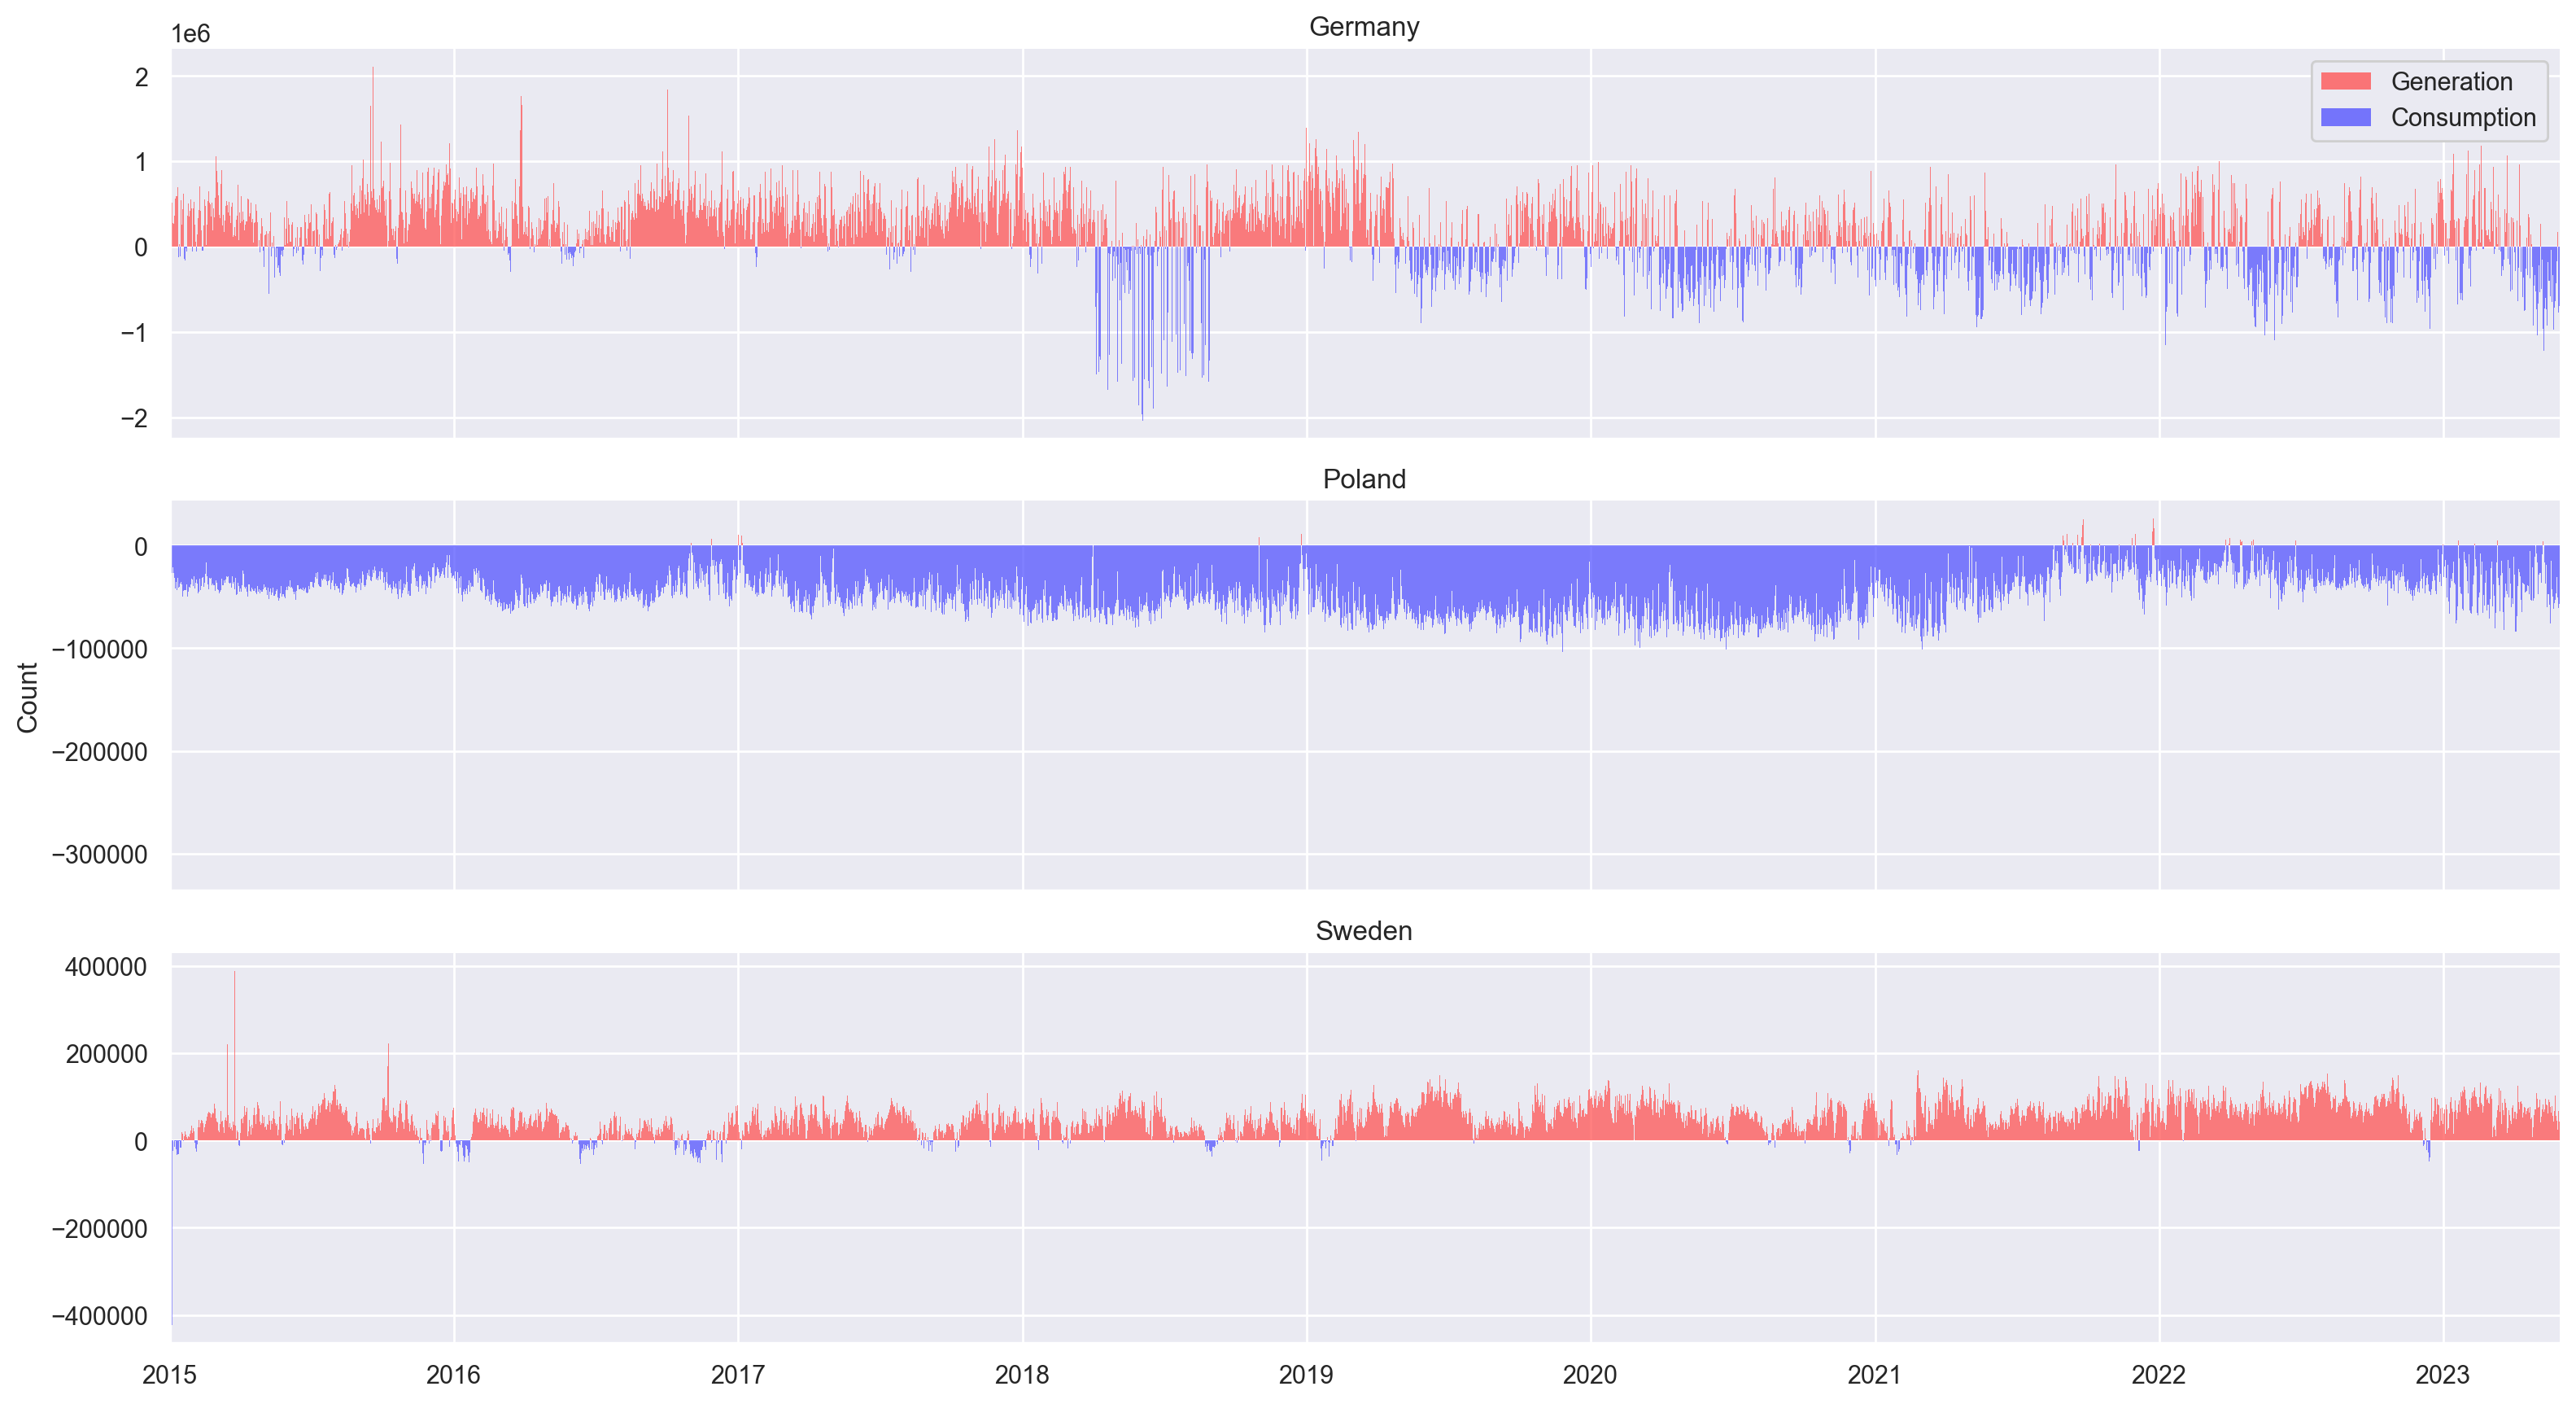

In [42]:
from matplotlib.dates import YearLocator, DateFormatter

g = sns.FacetGrid(together, row='Country', aspect=5.33, sharey=False)
g.map_dataframe(sns.histplot, x='Date', bins=len(together[together['Country'] == 'DE']), edgecolor='none', hue='Diff type', palette='seismic', weights='Diff', multiple='stack')
g.set(xlim=(together['Date'].min(), together['Date'].max()))

# Set custom titles for each facet
titles = ['Germany', 'Poland', 'Sweden']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# Remove y-label from the first plot (index 0)
g.axes[0, 0].set_ylabel('')

# Remove y-label from the third plot (index 2)
g.axes[2, 0].set_ylabel('')

# Set date ticks on every graph
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())  # Ensure date ticks are shown

    # Leave only years as ticks, remove months and days
    years = YearLocator()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as 'YYYY'

# Remove x-label "Date" from all graphs
g.set_xlabels('')

# Create a legend for the first plot (top right corner)
legend_labels = ['Generation', 'Consumption']
legend = g.axes[0, 0].legend(labels=legend_labels, loc='upper right')

# Add the legend to the first plot
g.axes[0, 0].add_artist(legend)

plt.show()

Let's find out whether Germany has a surplus or deficit starting from 2019. 

In [43]:
de_diff = together[(together['Country'] == 'DE') & (together['Date'] > '2019-01-01')]
de_diff

,Date,Country,Day-ahead Total Load Forecast,Actual Total Load,Generated,Diff,Diff type
4386,2019-01-02,DE,5301283.0,5555423.0,6320312.0,764889.0,True
4389,2019-01-03,DE,5496485.0,5853151.0,6292571.0,439420.0,True
4392,2019-01-04,DE,5268450.0,5943238.0,6774475.0,831237.0,True
4395,2019-01-05,DE,5034103.0,5265350.0,6472630.0,1207280.0,True
4398,2019-01-06,DE,4681883.0,4828088.0,5701843.0,873755.0,True
...,...,...,...,...,...,...,...
9204,2023-05-27,DE,4286700.0,3993435.0,3568999.0,-424436.0,False
9207,2023-05-28,DE,3792233.0,3605710.0,3438007.0,-167703.0,False
9210,2023-05-29,DE,4099313.0,3703838.0,3872541.0,168703.0,True
9213,2023-05-30,DE,5043255.0,4724007.0,3954207.0,-769800.0,False


In [44]:
de_diff.groupby('Diff type').agg({'Diff': 'sum'})

,Diff
Diff type,
False,-270951382.0
True,305255353.0


- Here we see that Sweden mostly covers its demand with local energy. Although they had to buy a little bit of energy in 2015, 2016 and in 2017.
- Germany was able to cover its demand untill 2018. From 2019 they have started to generate and import about the same amout of energy. 
- Poland, on the other hand, has to constantly import energy. 

## Conclusion

- Sweden: dominated by nuclear and renewables.

- Poland: transitioning from fossil fuels, imports energy.

- Germany: balanced fossil and renewables, high volume (~7M MW), nevertheless has to import energy srarting from 2019.

- Consumption: follows normal seasonality pattern. 

- When it comes to Generation Consumption difference: 
    - Sweden has a surplus, 
    - Germany balances generation and import, but still has a surplus, 
    - Poland  has deficit. 
